# How to build a Process Behavior Chart (PBC)

Process Behavior Charts (PBCs) are a graphical analysis tool for predicting how a process will behave in the future based on how it has behaved in the past. 

In [195]:
import pandas as pd # Used to manipulate data
from matplotlib import pyplot as plt # Used for plotting
import numpy as np # Used for masking 
%matplotlib inline

Read CSV from github repo

In [6]:
dataset_url = "https://raw.githubusercontent.com/jimlehner/datasets/main/childhood_poverty_rate_w_TT_2010_to_2020.csv"

In [185]:
df = pd.read_csv(dataset_url, index_col=False)
df

,Group,Year,Poverty Rate (%)
0,Children (<18),2010,17.2
1,Children (<18),2011,17.2
2,Children (<18),2012,18.1
3,Children (<18),2013,17.2
4,Children (<18),2014,17.5
5,Children (<18),2015,16.7
6,Children (<18),2016,15.6
7,Children (<18),2017,15.6
8,Children (<18),2018,13.1
9,Children (<18),2019,11.4


Convert 'Year' column to dtype string. This must be done to properly highlight values outside the process limits.

In [322]:
df['Year'] = df['Year'].astype('string')
df.dtypes

Group                object
Year                 string
Poverty Rate (%)    float64
Moving range        float64
dtype: object

## Step #2: Calculate the mean

In [190]:
mean = round(df['Poverty Rate (%)'].mean(),1)
mean

15.3

## Step #3:Calculate the moving ranges
A moving range is the absolute value of the difference of subsequent values in a data set. 

In [193]:
df['Moving range'] = round(abs(df['Poverty Rate (%)'].diff()),1)
df

,Group,Year,Poverty Rate (%),Moving range
0,Children (<18),2010,17.2,NaN
1,Children (<18),2011,17.2,0.0
2,Children (<18),2012,18.1,0.9
3,Children (<18),2013,17.2,0.9
4,Children (<18),2014,17.5,0.3
5,Children (<18),2015,16.7,0.8
6,Children (<18),2016,15.6,1.1
7,Children (<18),2017,15.6,0.0
8,Children (<18),2018,13.1,2.5
9,Children (<18),2019,11.4,1.7


# Step #4: Calculate the average moving range

In [169]:
AmR = round(df['Moving range'].mean(),1)
AmR

1.1

# Step 5: Calculate the process limits
To build an XmR-chart (Process Behavior Chart) we must calculate three process limits. The first two process limits, the upper process limit (UPL) and lower process limit (LPL), are used to bound the variation associated with the X-Chart (individual values plot). The third process limit, the upper range limit (URL), is used to bound the variation associated with the mR-chart (moving range plot).

In [170]:
C1, C2 = 2.66, 3.27
C1, C2

(2.66, 3.27)

## Calculate the upper and lower process limits

In [171]:
UPL = round(mean + (C1*AmR),1)
LPL = round(mean - (C1*AmR),1)
# LPL cannot be less than zero 
LPL = max(LPL,0)
UPL, LPL

(18.2, 12.4)

## Calculate the upper range limit

In [172]:
URL = round((C2*AmR),1)
URL

3.6

# Step 6: Put it all together!

In [173]:
# Store dataframe columns in variables
data = df['Poverty Rate (%)']
mRs = df['Moving range']
labels = df['Year'].tolist()
print(type(labels[0]))

<class 'str'>


In [234]:
# Create masking parameters for values inside and outside process limits on x-chart
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
middle = np.ma.masked_where((data < LPL) | (data > UPL), data)

In [235]:
# Create masking parameters for values outside URL on mR-chart
url_lim = np.ma.masked_where(data < URL, mRs)
url_mid = np.ma.masked_where(data > URL, mRs)

In [233]:
# Create list of tuples that specify value and color for each horizontal line
xchart_lines = [(mean,'black'), (UPL,'red'), (LPL,'red')]
mRchart_lines = [(AmR,'black'), (URL,'red')]
# Create list of tuples with y-coordinate and labels for x-chart process limits and centerline 
xchart_labels = [(UPL,UPL),(LPL,LPL),(mean,mean)]
# Create list of tuples with y-coordinate and labels for mR-chart process limit and centerline
mRchart_labels = [(URL,URL),(AmR,AmR)]

## Create the X-chart

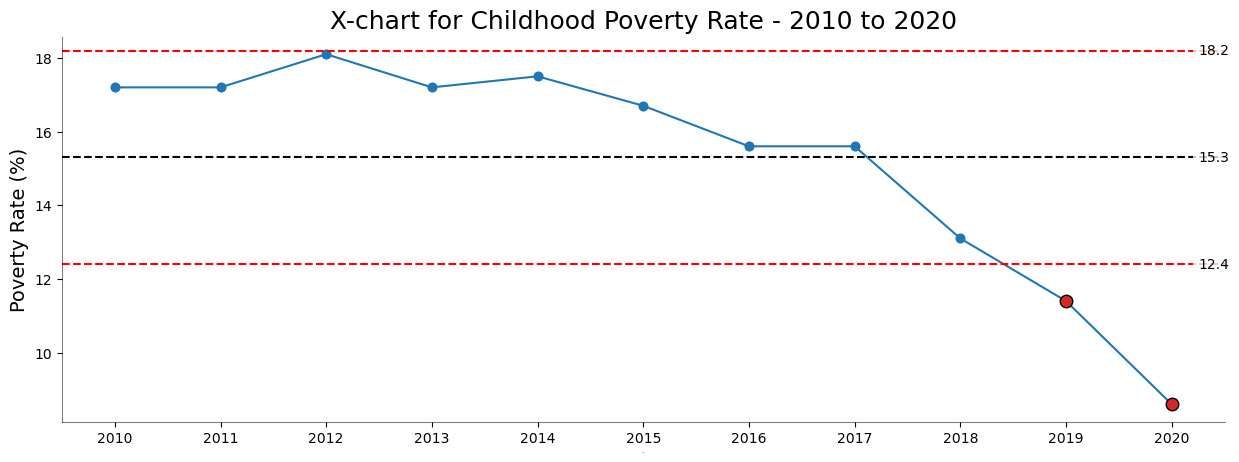

In [313]:
# Plot only x-chart
fig, ax = plt.subplots(figsize=(15,5))

# Plot data 
ax.plot(labels ,data)

# Add masking parameters to color values outside process limits
ax.plot(labels, data, middle, marker='o', ls='none', color='tab:blue')
ax.plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
ax.plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add centerline and process limits 
for value, color in xchart_lines:
    plt.axhline(value, ls='--', c=color)
    
# Add text labels for limits and centerline
for y, label in xchart_labels:
    plt.text(len(data)-0.75, y, label, va='center',
            bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
    
# Specify spine visibility 
ax.spines[['top','right']].set_visible(False)
ax.spines[['left','bottom']].set_alpha(0.5)

# Specify axis labels and title
plt.xlabel('Year',fontsize=0)
plt.ylabel('Poverty Rate (%)', fontsize=14)
plt.title('X-chart for Childhood Poverty Rate - 2010 to 2020', fontsize=18)

# Show plot
plt.show()

## Create the mR-chart

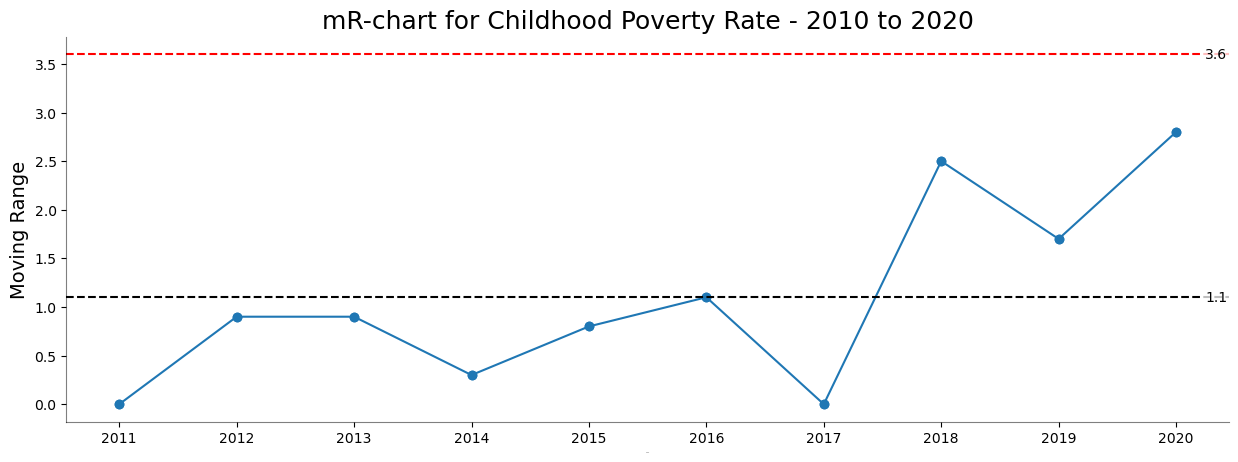

In [244]:
# Plot only the mR-chart
fig,ax = plt.subplots(figsize=(15,5))

# Plot data 
ax.plot(labels , mRs)

# Add masking parameters to color values outside process limits
ax.plot(labels, mRs, url_lim, marker='o', ls='none', color='tab:blue')
ax.plot(labels, url_mid, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add centerline and process limits 
for value, color in mRchart_lines:
    plt.axhline(value, ls='--', c=color)
    
# Add text labels for limits and centerline
for y, label in mRchart_labels:
    plt.text(len(data)-0.75, y, label, va='center',
            bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))

# Specify spine visibility 
ax.spines[['top','right']].set_visible(False)
ax.spines[['left','bottom']].set_alpha(0.5)

# Specify axis labels and title
plt.xlabel('Year',fontsize=0)
plt.ylabel('Moving Range', fontsize=14)
plt.title('mR-chart for Childhood Poverty Rate - 2010 to 2020', fontsize=18)

# Show plot
plt.show()

## Create the XmR-chart (both plots at the same time

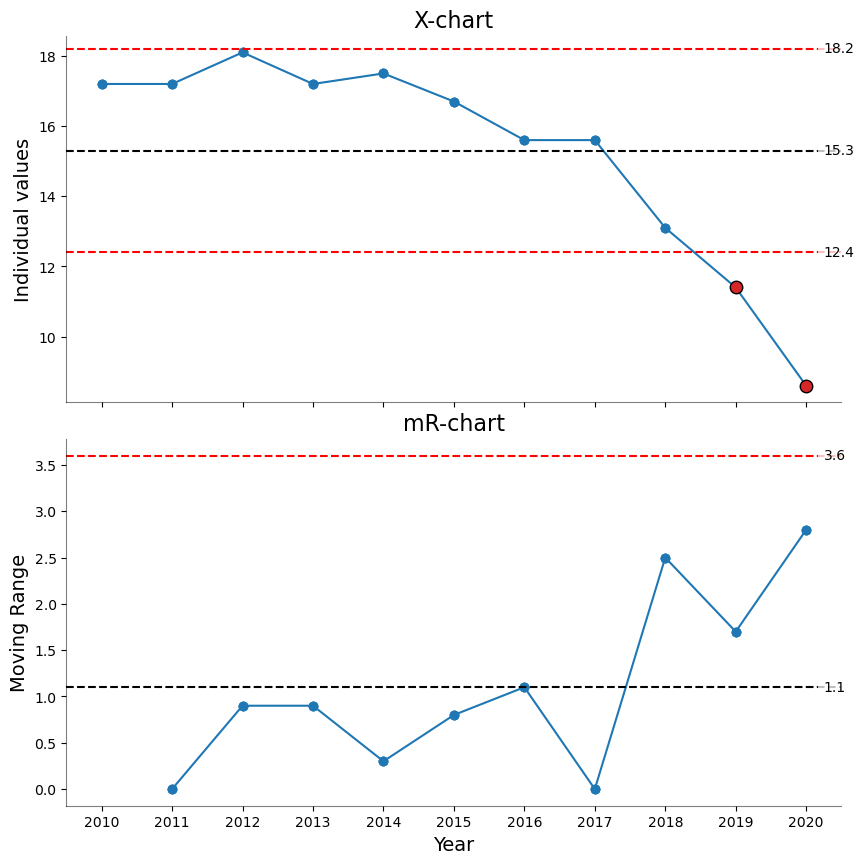

In [295]:
# Plot only x-chart
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,10))
plt.subplots_adjust(hspace=0.1)

# Create a data list for iterating 
data_list = [data, mRs]

# Plot data
for i, axis in enumerate(ax):
    axis.plot(labels, data_list[i], marker='o')

# Add masking parameters to color values outside process limits on x-chart
ax[0].plot(labels, data, middle, marker='o', ls='none', color='tab:blue')
ax[0].plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
ax[0].plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
# Add masking parameters to code values outside limits on mR-chart
ax[1].plot(labels, mRs, url_lim, marker='o', ls='none', color='tab:blue')
ax[1].plot(labels, url_mid, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add centerline and process limits for x-chart
for value, color in plot_lines:
    ax[0].axhline(value, ls='--', c=color)
# Add centerline and process limit for mR-chart
for value, color in mRchart_lines:
    plt.axhline(value, ls='--', c=color)

# Add text labels for limits and centerline on x-chart
for y, label in xchart_labels:
    ax[0].text(len(data)-0.75, y, label, va='center',
            bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
# Add text labels for limits and centerline on mR-chart
for y, label in mRchart_labels:
    ax[1].text(len(data)-0.75, y, label, va='center',
            bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))
    
# Specify spine visibility 
for i in range(2):
    ax[i].spines[['top','right']].set_visible(False)
    ax[i].spines[['left','bottom']].set_alpha(0.5)

# Create label lists
y_labels = ['Individual values', 'Moving Range']
subplot_titles = ['X-chart', 'mR-chart']

for i, axis in enumerate(ax):
    axis.set_ylabel(y_labels[i], fontsize=14)
    axis.set_xlabel(x_labels[i], fontsize=14)
    axis.set_title(subplot_titles[i], fontsize=16)

# Specify x-axis label for mR-chart
ax[1].set_xlabel('Year',fontsize=14)

# Show plot
plt.show()

## Create function to generate x-chart 

In [318]:
def xchart(df, parameter, xticklabels, title='X-Chart', xlabel='', ylabel='Individual Values'):
    """
    paramter and xticklabels are columns in your dataframe.
    xticklabels should be dtype string to ensure proper mapping when special causes are present
    """
    # Create data and labels objects
    data = df[parameter]
    labels = df[xticklabels].tolist()
    
    # Calculate statistics 
    mean = round(data.mean(),1)
    mRs = round(abs(data.diff()),1)
    AmR = round(mRs.mean(),1)
    # Calculate process limits 
    UPL = round(mean + (2.66*AmR),1) # 2.66 is C1
    LPL = round(mean - (2.66*AmR),1)
    
    # Plot only x-chart
    fig, ax = plt.subplots(figsize=(15,5))

    # Plot data 
    ax.plot(labels ,data)

    # Add masking parameters to color values outside process limits
    ax.plot(labels, data, middle, marker='o', ls='none', color='tab:blue')
    ax.plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
            markeredgecolor='black', markersize=9)
    ax.plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
            markeredgecolor='black', markersize=9)

    # List of tuples for specifying mRchart lines
    xchart_lines = [(mean,'black'), (UPL,'red'), (LPL,'red')]
    # Add centerline and process limits 
    for value, color in xchart_lines:
        plt.axhline(value, ls='--', c=color)
        
    # Create list of tuples with y-coordinate and labels for x-chart process limits and centerline 
    xchart_labels = [(UPL,UPL),(LPL,LPL),(mean,mean)]
        
    # Add text labels for limits and centerline
    for y, label in xchart_labels:
        plt.text(len(data)-0.75, y, label, va='center',
                bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))

    # Specify spine visibility 
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left','bottom']].set_alpha(0.5)

    # Specify axis labels and title
    plt.xlabel(xlabel,fontsize=0)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=18)
    
    # Show plot
    plt.show()

## Test chart function

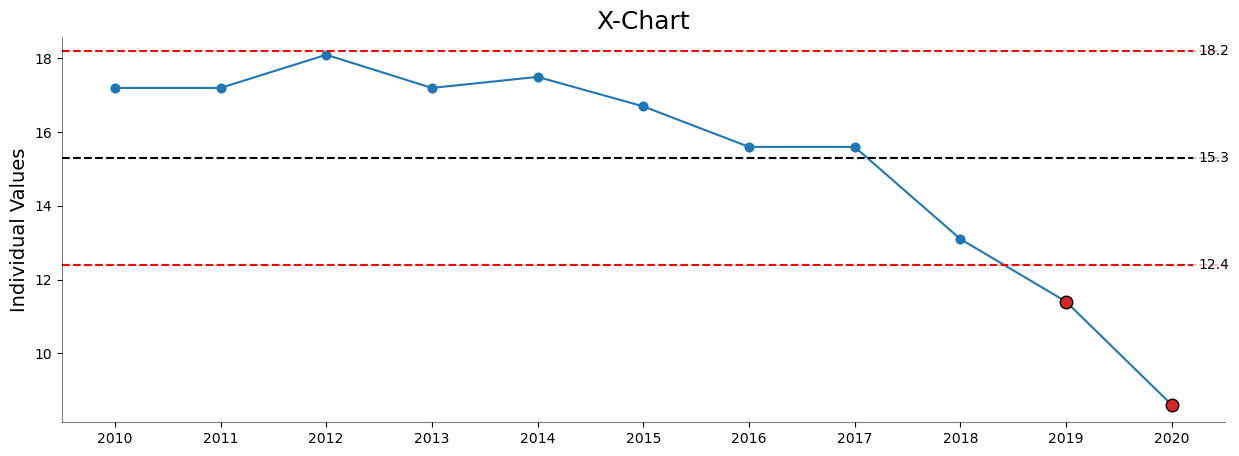

In [319]:
xchart(df, 'Poverty Rate (%)', 'Year')

In [320]:
def mRchart(df, parameter, xticklabels, title='X-Chart', xlabel='', ylabel='Moving Range'):
    """
    paramter and xticklabels are columns in your dataframe.
    xticklabels should be dtype string to ensure proper mapping when special causes are present
    """
    # Create data and labels objects
    data = df[parameter]
    labels = df[xticklabels].tolist()
    
    # Calculate statistics 
    mean = round(data.mean(),1)
    mRs = round(abs(data.diff()),1)
    AmR = round(mRs.mean(),1)
    # Calculate process limits 
    URL = round((3.27*AmR),1) # 3.27 is C1
    
    # Plot only x-chart
    fig, ax = plt.subplots(figsize=(15,5))

    # Plot data 
    ax.plot(labels , mRs)

    # Add masking parameters to color values outside process limits
    ax.plot(labels, mRs, url_lim, marker='o', ls='none', color='tab:blue')
    ax.plot(labels, url_mid, marker='o', ls='none', color='tab:red',
            markeredgecolor='black', markersize=9)
    
    # List of tuples for specifying mRchart lines
    mRchart_lines = [(AmR,'black'), (URL,'red')]
    # Add centerline and process limits 
    for value, color in mRchart_lines:
        plt.axhline(value, ls='--', c=color)
    
    # Create list of tuples with y-coordinate and labels for mR-chart process limit and centerline
    mRchart_labels = [(URL,URL),(AmR,AmR)]
    # Add text labels for limits and centerline
    for y, label in mRchart_labels:
        plt.text(len(data)-0.75, y, label, va='center',
                bbox=dict(facecolor='white', alpha=0.75, edgecolor='none'))

    # Specify spine visibility 
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left','bottom']].set_alpha(0.5)

    # Specify axis labels and title
    plt.xlabel(xlabel,fontsize=0)
    plt.ylabel(ylabel, fontsize=14)
    plt.title('mR-chart', fontsize=18)
    # Show plot
    plt.show()

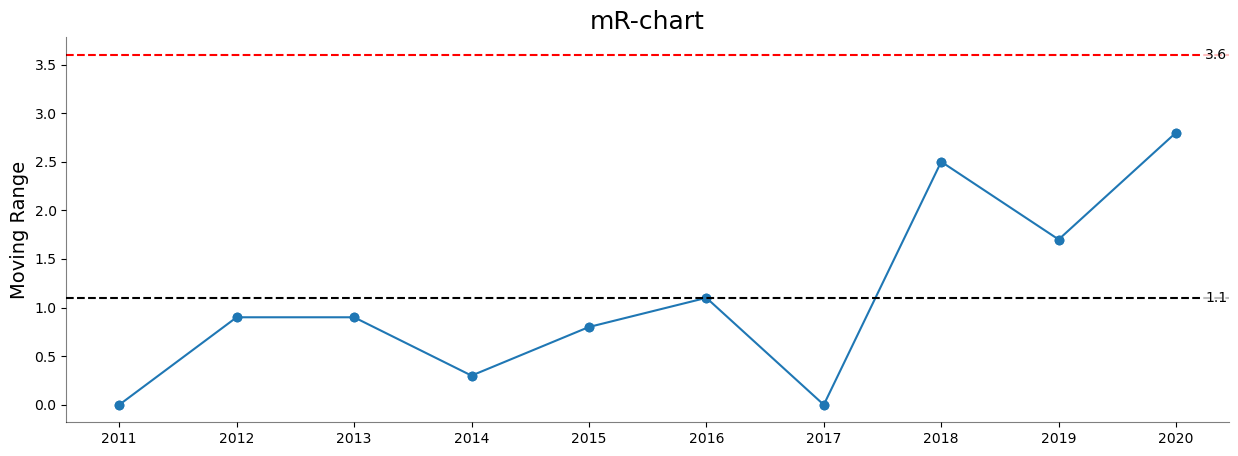

In [321]:
mRchart(df, 'Poverty Rate (%)', 'Year')